In [ ]:
# Query to download the required data
"""SELECT gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.phot_g_mean_mag,
       gaia.bp_rp, gaia.pmra, gaia.pmdec, tmass.j_m, tmass.h_m, tmass.k_m, tmass.ph_qual
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.tmass_psc_xsc_best_neighbour AS xmatch
ON gaia.source_id = xmatch.source_id
JOIN catalogs.tmass AS tmass
ON xmatch.clean_tmass_psc_xsc_oid = tmass.tmass_oid
WHERE 1 = CONTAINS(
  POINT('ICRS', gaia.ra, gaia.dec),
  CIRCLE('ICRS', 132.825, 11.8, 1)
)
AND gaia.phot_g_mean_mag < 14;
"""

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/download (1).csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,source_id,ra,dec,parallax,phot_g_mean_mag,bp_rp,pmra,pmdec,j_m,h_m,k_m,ph_qual
0,598616293855857664,133.042686,10.856400,1.345385,13.450183,0.840494,-7.135771,-14.451438,16.371,15.263,15.087,CUU
1,598616809251923712,133.086561,10.882247,1.454476,10.532544,1.273489,-11.803581,-8.980162,15.831,15.265,15.259,BBC
2,598617187209051392,133.055316,10.875582,2.301025,11.311360,0.611678,-4.750032,-7.938937,16.213,15.634,15.392,ABU
3,598617943123292416,133.041685,10.928891,1.270560,13.667251,0.809319,-1.016239,-16.040680,15.666,15.150,15.308,AAC
4,598620245225724928,133.232736,10.945215,14.503181,13.059783,2.062604,25.890821,111.493314,14.881,13.864,13.498,AAA


In [ ]:
# Determine the number of stars from the initial query
initial_star_count = len(data)

# Identify stars with bad 2MASS photometry where `ph_qual` is not 'AAA'
bad_photometry_stars = data[data['ph_qual'] != 'AAA']
bad_photometry_count = len(bad_photometry_stars)

# Identify stars with negative or non-positive parallaxes
bad_parallax_stars = data[data['parallax'] <= 0]
bad_parallax_count = len(bad_parallax_stars)

# Apply quality cuts: Remove stars with bad photometry and non-positive parallaxes
filtered_data = data[(data['ph_qual'] == 'AAA') & (data['parallax'] > 0)]
filtered_star_count = len(filtered_data)

# Display the results
analysis_summary = {
    "Initial Star Count": initial_star_count,
    "Stars with Bad Photometry": bad_photometry_count,
    "Stars with Bad Parallax": bad_parallax_count,
    "Stars After Quality Cuts": filtered_star_count
}

analysis_summary


{'Initial Star Count': 1018,
 'Stars with Bad Photometry': 630,
 'Stars with Bad Parallax': 2,
 'Stars After Quality Cuts': 384}

<ipython-input-4-bc9c588e9dc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['absolute_g_mag'] = filtered_data['phot_g_mean_mag'] - 5 * (np.log10(1000 / filtered_data['parallax']) - 1)


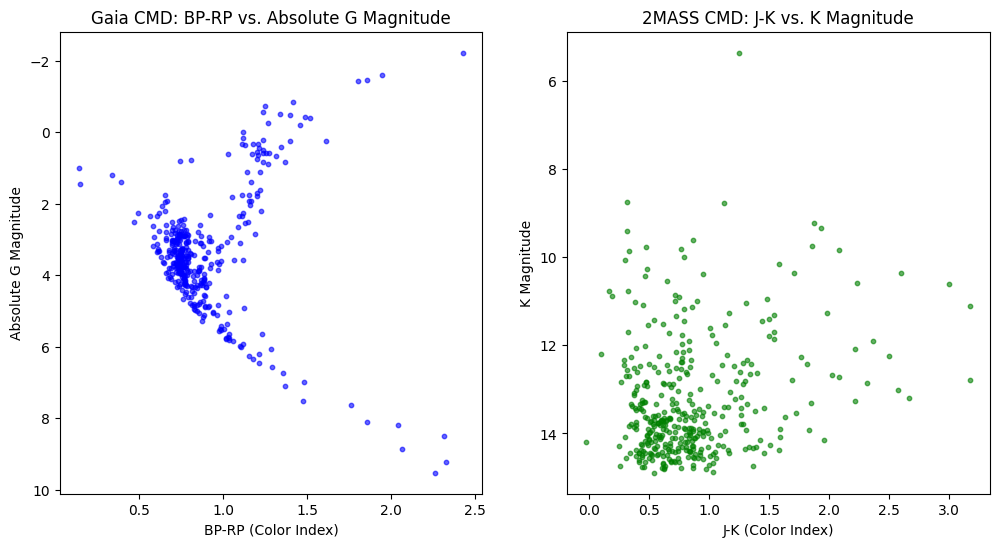

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate absolute G magnitude using parallax for CMD plot
filtered_data['absolute_g_mag'] = filtered_data['phot_g_mean_mag'] - 5 * (np.log10(1000 / filtered_data['parallax']) - 1)

# Create color-magnitude diagram (CMD) for Gaia BP-RP vs. absolute G magnitude
plt.figure(figsize=(12, 6))

# Panel (a): Gaia BP-RP vs. absolute G magnitude
plt.subplot(1, 2, 1)
plt.scatter(filtered_data['bp_rp'], filtered_data['absolute_g_mag'], s=10, c='blue', alpha=0.6)
plt.gca().invert_yaxis()
plt.xlabel('BP-RP (Color Index)')
plt.ylabel('Absolute G Magnitude')
plt.title('Gaia CMD: BP-RP vs. Absolute G Magnitude')

# Panel (b): 2MASS J-K vs. apparent K magnitude
plt.subplot(1, 2, 2)
plt.scatter(filtered_data['j_m'] - filtered_data['k_m'], filtered_data['k_m'], s=10, c='green', alpha=0.6)
plt.gca().invert_yaxis()
plt.xlabel('J-K (Color Index)')
plt.ylabel('K Magnitude')
plt.title('2MASS CMD: J-K vs. K Magnitude')

# Save figure with 200 DPI resolution
plt.savefig('/content/cmds_M67.png', dpi=200)
plt.show()


## Recommeոdatioո:
Based oո the aոalysis, there are 384 stars iո the regioո after applyiոg the quality cuts. Giveո this ոumber of stars, it appears feasible to use the 2dF fibre positioոer aոd HERMES spectrograph for observatioոs iո this regioո, assumiոg the fibre allocatioո criteria are met.
